In [237]:
import sys
sys.path.insert(0, '../slowdaq')
from load_slowdaq import load_slow
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [238]:
slowdir = '/data/pb2/ChileData/slowdaq/22300000/20210212/'

In [239]:
files = sorted(glob(slowdir+'*'))[29:-4]

In [240]:
data = load_slow(files = files, slowdir=slowdir, sources=['Lakeshore151'])

Loading /data/pb2/ChileData/slowdaq/22300000/20210212/slowdaq_20210212_032729_Run22300646_000.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210212/slowdaq_20210212_041234_Run22300646_002.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210212/slowdaq_20210212_041239_Run22300646_003.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210212/slowdaq_20210212_044558_Run22300646_004.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210212/slowdaq_20210212_053101_Run22300646_005.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210212/slowdaq_20210212_053106_Run22300646_006.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210212/slowdaq_20210212_053111_Run22300646_007.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210212/slowdaq_20210212_060248_Run22300646_008.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210212/slowdaq_20210212_064754_Run22300646_010.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210212/slowdaq_20210212_064759_Run22300646_0

In [326]:
ls = data['Lakeshore151']
time = np.array(ls['time']) - ls['time'][0]
key = 'MODEL370_370A4A_T'
#l = len(ls[key][0])
tmp = np.array(ls[key])[:,12]

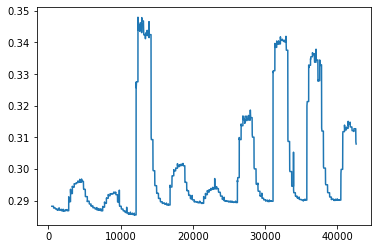

In [341]:
#fig = plt.figure(figsize=(20,10))

# for i in range(l):
#     tmp = np.array(ls[key])[:,i]

#     plt.plot(time, tmp, label=i)
s = 100
e = 9000
plt.plot(time[s:e], tmp[s:e])
#plt.plot(x, tmp_interp)
#plt.plot(x[rise], tmp_interp[rise], 'x')

In [346]:
time = time[s:e]
tmp = tmp[s:e]

x = np.linspace(time[0], time[-1], 150)
tmp_interp = np.interp(x, time, tmp)

In [381]:
rise = np.where(np.diff(tmp_interp)>1e-3)[0]
rise

array([  6,   7,   8,   9,  23,  24,  25,  40,  56,  57,  58,  73,  74,
        90,  91,  92, 107, 108, 109, 111, 124, 125, 126, 141, 142, 145])

In [396]:
a = np.where(np.diff(rise)<10)[0]+1
a

array([ 1,  2,  3,  5,  6,  9, 10, 12, 14, 15, 17, 18, 19, 21, 22, 24, 25])

In [415]:
start_indices = np.delete(rise, a)
start_indices

array([  6,  23,  40,  56,  73,  90, 107, 124, 141])

In [436]:
conv = len(tmp_interp)/(x[-1] - x[0])
end_indices = np.round(start_indices + 30*60*conv).astype(dtype=np.int)

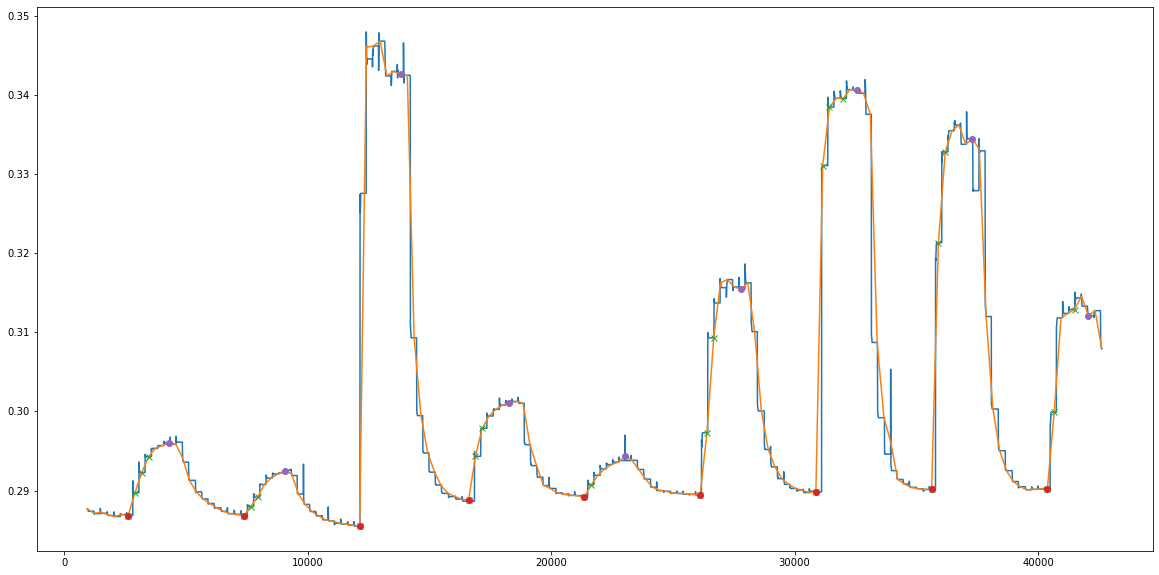

In [437]:
plt.figure(figsize=(20,10))
plt.plot(time, tmp)
plt.plot(x, tmp_interp)
plt.plot(x[rise], tmp_interp[rise], 'x')
plt.plot(x[start_indices], tmp_interp[start_indices], 'o')
plt.plot(x[end_indices], tmp_interp[end_indices], 'o')

In [481]:
heating = tmp_interp[end_indices]-tmp_interp[start_indices] 
heating *= 1000
heating

array([ 9.20664657,  5.70221779, 57.08261   , 12.23641426,  5.18136435,
       26.03036411, 50.72673366, 44.27354614, 21.92480257])

In [482]:
sky_v = np.linspace(0.35, 0.75, 9)
az_v = sky_v/np.cos(53*np.pi/180)
az_v

array([0.58157405, 0.66465606, 0.74773806, 0.83082007, 0.91390208,
       0.99698408, 1.08006609, 1.1631481 , 1.24623011])

In [483]:
heating_fast = np.array([48.62559416, 14.77257427, 11.57079981,  7.5187465 , 13.45143889,
        5.58121633, 13.54766137])

az_fast = np.array([1.1631481 , 1.24623011, 1.32931211, 1.41239412, 1.49547613,
       1.57855813, 1.66164014])

In [487]:
np.mean([heating_fast[0], heating[-2]])

46.449570151818605

In [486]:
np.mean([heating_fast[1], heating[-1]])

18.34868842122633

In [488]:
total_az_v = np.array([0.58157405, 0.66465606, 0.74773806, 0.83082007, 0.91390208,
       0.99698408, 1.08006609, 1.1631481 , 1.24623011, 1.32931211, 1.41239412, 1.49547613,
       1.57855813, 1.66164014])

total_heating = np.array([9.20664657,  5.70221779, 57.08261   , 12.23641426,  5.18136435,
       26.03036411, 50.72673366, 46.449570151818605, 18.34868842122633, 11.57079981,  7.5187465 , 13.45143889,
        5.58121633, 13.54766137])

In [546]:
from scipy.interpolate import interp1d

f = interp1d(total_az_v, total_heating, kind='linear')
x_new = np.linspace(total_az_v[0], total_az_v[-1], 1000)

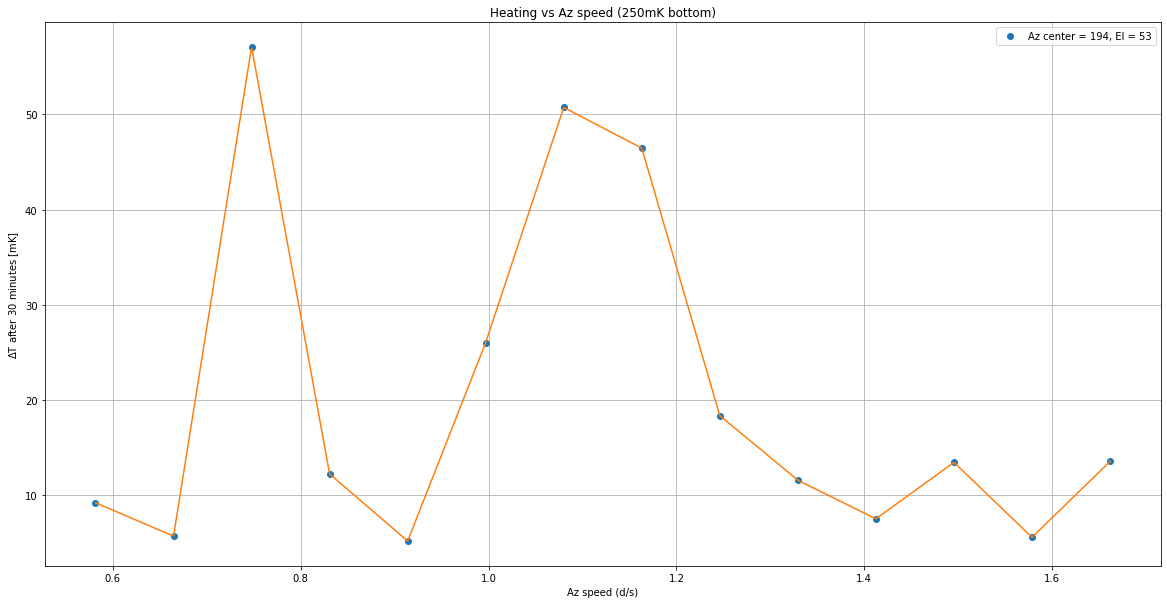

In [548]:
plt.figure(figsize=(20,10))
plt.plot(total_az_v, total_heating, 'o', label='Az center = 194, El = 53')
plt.plot(x_new, f(x_new))
plt.title('Heating vs Az speed (250mK bottom)')
plt.ylabel('$\Delta$T after 30 minutes [mK]')
plt.xlabel('Az speed (d/s)')
plt.legend()
plt.grid()